# Defining Our Strategy To Predict On Our Test Data

Throughout our preprocessing steps and training steps we have created certain reusable custom functions that we need to apply the same preprocessing steps in our train data as well before we can get it ready to apply ML models.

After applying the preprocessing steps using the functions we will predict on our test data, which is previously unseen data. We will evaluate the model predictions and recommend to management what need to be done.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Import Custom Functions

In [2]:
from my_functions import encode_cat_feats,handle_missing,handle_outliers,scale_data


# Import Trained Model

In [3]:
import joblib
trained_model = joblib.load("best_model.pkl")

In [4]:
trained_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [5]:
csv_file_path = '../../Data/Raw/test_df.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,22,Male,Medical,Married,Development,Developer,Travel_Rarely,6,1,1,69,3,1,3,0,No,20,4,3,3,3,2,2,2,2,No,3
1,31,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,6,4,2,76,1,2,3,4,Yes,18,2,12,3,2,7,7,7,7,Yes,2
2,39,Female,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,2,3,4,42,2,2,4,8,No,11,3,13,2,3,5,4,0,4,No,3
3,29,Female,Life Sciences,Married,Research & Development,Laboratory Technician,Travel_Frequently,2,1,4,97,3,1,2,0,No,13,3,4,3,3,3,2,0,2,No,3
4,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,3,36,3,1,2,4,No,13,2,8,2,3,5,2,0,4,No,3


# Applying Preprocessing Steps

In [6]:
handle_missing(df)

'There are no null values!'

In [7]:
handle_outliers(df)

Using 'Z-Score Index we found there are 16 Outliers
After handling outlier using IQR method we found there are 1 Outliers


In [8]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,22.0,Male,Medical,Married,Development,Developer,Travel_Rarely,6.0,1,1,69,3,1,3,0.0,No,20,4,3.000,3.0,3,2.0,2.0,2,2.0,No,3
1,31.0,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,6.0,4,2,76,1,2,3,4.0,Yes,18,2,12.000,3.0,2,7.0,7.0,5,7.0,Yes,2
2,39.0,Female,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,2.0,3,4,42,2,2,4,8.0,No,11,3,13.000,2.0,3,5.0,4.0,0,4.0,No,3
3,29.0,Female,Life Sciences,Married,Research & Development,Laboratory Technician,Travel_Frequently,2.0,1,4,97,3,1,2,0.0,No,13,3,4.000,3.0,3,3.0,2.0,0,2.0,No,3
4,36.0,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13.0,3,3,36,3,1,2,4.0,No,13,2,8.000,2.0,3,5.0,2.0,0,4.0,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,37.0,Female,Medical,Single,Research & Development,Manager R&D,Travel_Rarely,11.0,3,1,94,3,1,3,4.0,No,18,1,8.000,4.5,3,3.0,2.0,0,2.0,No,3
236,58.0,Female,Medical,Married,Development,Developer,Travel_Rarely,23.0,4,4,94,3,3,4,1.0,No,12,4,29.125,3.0,2,20.5,10.0,5,6.0,Yes,3
237,53.0,Male,Medical,Married,Finance,Finance Manager,Travel_Rarely,24.0,4,2,48,4,3,4,3.0,No,15,3,11.000,2.0,3,4.0,3.0,1,2.0,No,2
238,29.0,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,1.0,4,2,76,1,1,4,1.0,No,18,4,10.000,4.5,3,10.0,7.0,2,8.0,No,3


In [9]:
df =  encode_cat_feats(df)
df.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Healthcare Representative,EmpJobRole_Human Resources,EmpJobRole_Laboratory Technician,EmpJobRole_Manager,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes,PerformanceRating
0,22.0,6.0,1,1,69,3,1,3,0.0,20,4,3.0,3.0,3,2.0,2.0,2,2.0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,31.0,6.0,4,2,76,1,2,3,4.0,18,2,12.0,3.0,2,7.0,7.0,5,7.0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
2,39.0,2.0,3,4,42,2,2,4,8.0,11,3,13.0,2.0,3,5.0,4.0,0,4.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,29.0,2.0,1,4,97,3,1,2,0.0,13,3,4.0,3.0,3,3.0,2.0,0,2.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,36.0,13.0,3,3,36,3,1,2,4.0,13,2,8.0,2.0,3,5.0,2.0,0,4.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [10]:
X = df.drop(columns=['PerformanceRating'])
true_labels = df['PerformanceRating']

In [11]:
X = scale_data(X)

In [12]:
X

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Healthcare Representative,EmpJobRole_Human Resources,EmpJobRole_Laboratory Technician,EmpJobRole_Manager,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,0.098765,0.212766,0.00,0.000000,0.557143,0.666667,0.00,0.666667,0.000000,0.642857,1.000000,0.103004,0.625,0.666667,0.097561,0.137931,0.4,0.134454,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.320988,0.212766,0.75,0.333333,0.657143,0.000000,0.25,0.666667,0.470588,0.500000,0.333333,0.412017,0.625,0.333333,0.341463,0.482759,1.0,0.470588,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
2,0.518519,0.042553,0.50,1.000000,0.171429,0.333333,0.25,1.000000,0.941176,0.000000,0.666667,0.446352,0.375,0.666667,0.243902,0.275862,0.0,0.268908,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.271605,0.042553,0.00,1.000000,0.957143,0.666667,0.00,0.333333,0.000000,0.142857,0.666667,0.137339,0.625,0.666667,0.146341,0.137931,0.0,0.134454,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.444444,0.510638,0.50,0.666667,0.085714,0.666667,0.00,0.333333,0.470588,0.142857,0.333333,0.274678,0.375,0.666667,0.243902,0.137931,0.0,0.268908,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.469136,0.425532,0.50,0.000000,0.914286,0.666667,0.00,0.666667,0.470588,0.500000,0.000000,0.274678,1.000,0.666667,0.146341,0.137931,0.0,0.134454,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
236,0.987654,0.936170,0.75,1.000000,0.914286,0.666667,0.50,1.000000,0.117647,0.071429,1.000000,1.000000,0.625,0.333333,1.000000,0.689655,1.0,0.403361,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
237,0.864198,0.978723,0.75,0.333333,0.257143,1.000000,0.50,1.000000,0.352941,0.285714,0.666667,0.377682,0.375,0.666667,0.195122,0.206897,0.2,0.134454,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
238,0.271605,0.000000,0.75,0.333333,0.657143,0.000000,0.00,1.000000,0.117647,0.500000,1.000000,0.343348,1.000,0.666667,0.487805,0.482759,0.4,0.537815,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Predicting Test Data With Trained Model

In [13]:
y_pred = trained_model.predict(X)
accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='weighted')
recall = recall_score(true_labels, y_pred, average='weighted')
f1 = f1_score(true_labels, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9291666666666667
Precision: 0.9284852493185826
Recall: 0.9291666666666667
F1-score: 0.9277281556054057


In [14]:
from sklearn.metrics import classification_report
class_names = ['Class 2', 'Class 3', 'Class 4']
classification_rep = classification_report(true_labels, y_pred, target_names=class_names)

print(classification_rep)

              precision    recall  f1-score   support

     Class 2       0.86      0.86      0.86        29
     Class 3       0.94      0.97      0.95       184
     Class 4       0.91      0.74      0.82        27

    accuracy                           0.93       240
   macro avg       0.90      0.86      0.88       240
weighted avg       0.93      0.93      0.93       240



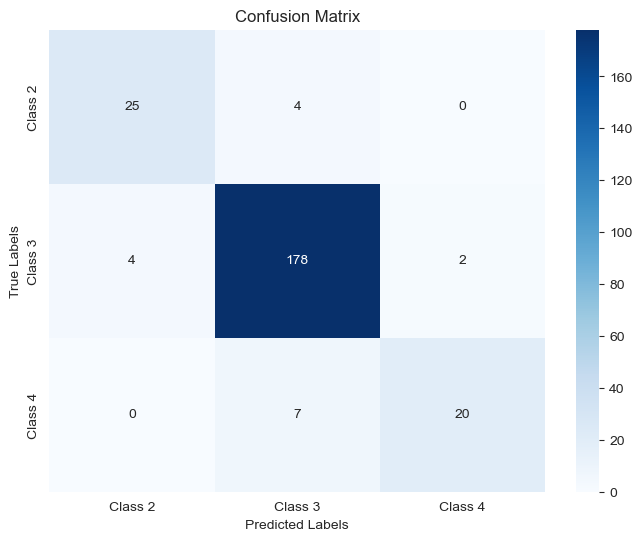

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Recommendations To Management

**Overall Model Performance:**
The model shows promising results with an overall accuracy of 92%, indicating that it is capable of correctly predicting the employee ratings in most cases.

**Class-Specific Performance:**
Class 3 (Rating 3) has the highest precision, recall, and F1-score among all classes. This suggests that the model is highly accurate in predicting employees with a rating of 3.
Class 2 (Rating 2) has decent precision and recall, indicating that the model performs well in identifying employees with a rating of 2.
Class 4 (Rating 4) has lower precision and recall compared to the other classes. This could indicate that the model has more difficulty correctly identifying employees with a rating of 4.

**Recommendations:**
The model's performance varies among different employee rating classes. It might be beneficial to investigate why Class 4 predictions have lower precision and recall. Are there specific features or patterns that contribute to this discrepancy? Addressing these issues could potentially improve the model's performance for Class 4 predictions.

**Use Case and Business Impact:**
Assess the business impact of misclassifications for each rating category. For instance, misclassifying a high-performing employee (Class 4) could have different consequences compared to misclassifying an average-performing employee (Class 3). Consider the consequences of false positives and false negatives in the context of employee performance evaluations.

**Imbalanced Classes:**
Class 3 has the largest number of instances, potentially causing an imbalance in the training data. If accurate prediction of other classes is equally important, consider strategies such as oversampling or using different evaluation metrics to address this imbalance.

**Continuous Monitoring:**
Regularly monitor the model's performance over time and validate its predictions against new data. Periodic updates and model retraining can help maintain accuracy and relevance.

**Feedback Loop:**
Establish a feedback loop with the team that generates the employee ratings. Collect feedback on the model's predictions and refine the model based on the input from domain experts.
